<a href="https://colab.research.google.com/github/ChamikaRohan/cat-dog-classifier_using_deep_learning/blob/main/Cat_Dog_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install tensorflow -q

!pip install opendatasets -q

In [ ]:
# import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: chamikarohan
Your Kaggle Key: ··········


100%|██████████| 217M/217M [00:02<00:00, 108MB/s]


In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = (128,128)

In [ ]:
train_data_dir = "/content/cats-and-dogs-for-classification/cats_dogs/train"
test_data_dir = "/content/cats-and-dogs-for-classification/cats_dogs/test"

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='training',
                                                         validation_split=0.1,
                                                         seed=42)

validation_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                              batch_size=BATCH_SIZE,
                                                              image_size=IMAGE_SIZE,
                                                              subset='validation',
                                                              validation_split=0.1,
                                                              seed=42)

test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                        batch_size=BATCH_SIZE,
                                                        image_size=IMAGE_SIZE,
                                                        )

Found 8000 files belonging to 2 classes.
Using 7200 files for training.
Found 8000 files belonging to 2 classes.
Using 800 files for validation.
Found 2000 files belonging to 2 classes.


In [ ]:
class_names = train_data.class_names
class_names

['cats', 'dogs']

In [ ]:
for image_batch, label_batch in train_data.take(1):
  print(image_batch.shape)
  print(label_batch.shape)

(32, 128, 128, 3)
(32,)


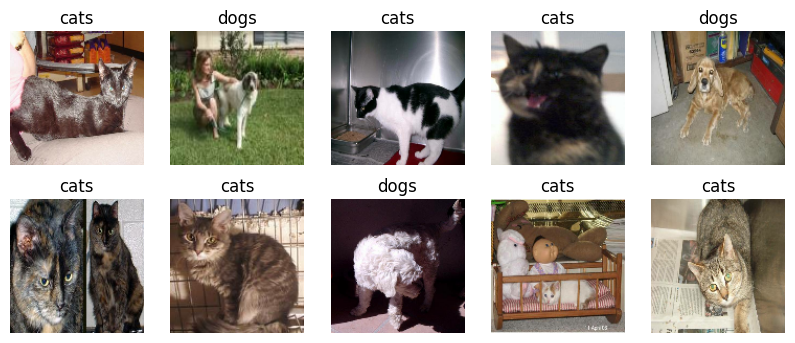

In [ ]:
# plot sata sample
plt.figure(figsize=(10,4))
for image,label in train_data.take(1):
  for i in range(10):
    ax = plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(class_names[label[i]])
    plt.axis('off')

In [ ]:
for image,label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[0.26377553 0.21301365 0.11813726]
   [0.5353891  0.38347432 0.20359987]
   [0.5515419  0.38676974 0.19257022]
   ...
   [0.67971814 0.58952206 0.3934436 ]
   [0.6745098  0.58431375 0.3882353 ]
   [0.66332316 0.57312703 0.37704864]]

  [[0.23344655 0.18925542 0.15019915]
   [0.48180148 0.34551165 0.20767464]
   [0.5208326  0.37555075 0.18625896]
   ...
   [0.6862745  0.59607846 0.4       ]
   [0.67977345 0.5895774  0.39349893]
   [0.6684283  0.5782322  0.3821538 ]]

  [[0.22841606 0.19784008 0.19708419]
   [0.3618566  0.26410797 0.1702663 ]
   [0.44014892 0.315451   0.15907294]
   ...
   [0.6901961  0.6        0.40392157]
   [0.68235296 0.5921569  0.39607844]
   [0.66525733 0.57506126 0.37898284]]

  ...

  [[0.7563417  0.70143974 0.5092828 ]
   [0.7183206  0.66341865 0.47126177]
   [0.73020285 0.6753009  0.48314402]
   ...
   [0.4885723  0.440625   0.2917794 ]
   [0.52421874 0.47069523 0.32435638]
   [0.5433364  0.492356   0.3220641 ]]

  [[0.7295343  0.6746324  0.482530

In [ ]:
train_data = train_data.map(lambda x,y:(x/255,y))
validation_data = validation_data.map(lambda x,y:(x/255,y))
test_data = test_data.map(lambda x,y:(x/255,y))

In [ ]:
for image,label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[0.3961086  0.4078733  0.42748114]
   [0.4355866  0.44202045 0.44825512]
   [0.46131483 0.45220995 0.44154495]
   ...
   [0.5092645  0.5212284  0.5342339 ]
   [0.4975392  0.5219724  0.5321287 ]
   [0.505491   0.54506695 0.5488084 ]]

  [[0.33411878 0.3458835  0.36549133]
   [0.38969606 0.39134222 0.39917278]
   [0.44707006 0.44312912 0.43156356]
   ...
   [0.4577287  0.473415   0.4851797 ]
   [0.47034866 0.49478185 0.5049381 ]
   [0.54429597 0.57679373 0.58407426]]

  [[0.3629136  0.37216607 0.39051777]
   [0.35912177 0.36073023 0.36857337]
   [0.41327012 0.40934855 0.3990238 ]
   ...
   [0.4734801  0.49224457 0.5040093 ]
   [0.5106449  0.53025275 0.54201746]
   [0.49931952 0.52692366 0.53602296]]

  ...

  [[0.46303937 0.47872567 0.49049038]
   [0.4769317  0.49261796 0.50438267]
   [0.5119452  0.52763146 0.53939617]
   ...
   [0.3196794  0.34126672 0.3794552 ]
   [0.18020116 0.19929379 0.21234119]
   [0.35724655 0.36969173 0.3621856 ]]

  [[0.49081576 0.50650203 0.518266

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal",input_shape=(128, 128, 3)),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2)
])

In [ ]:
model = tf.keras.models.Sequential()

model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)      

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
start_time = time.time()

history = model.fit(train_data,
                    epochs=20,
                    validation_data=validation_data)

end_time = time.time()

Epoch 1/20
225/225 [==============================] - 17s 42ms/step - loss: 0.6728 - accuracy: 0.5881 - val_loss: 0.6677 - val_accuracy: 0.6175
Epoch 2/20
225/225 [==============================] - 12s 50ms/step - loss: 0.6488 - accuracy: 0.6161 - val_loss: 0.6409 - val_accuracy: 0.6338
Epoch 3/20
225/225 [==============================] - 10s 44ms/step - loss: 0.6311 - accuracy: 0.6389 - val_loss: 0.7330 - val_accuracy: 0.5850
Epoch 4/20
225/225 [==============================] - 10s 44ms/step - loss: 0.6147 - accuracy: 0.6622 - val_loss: 0.6715 - val_accuracy: 0.5562
Epoch 5/20
225/225 [==============================] - 10s 42ms/step - loss: 0.6026 - accuracy: 0.6740 - val_loss: 1.2143 - val_accuracy: 0.5375
Epoch 6/20
225/225 [==============================] - 8s 36ms/step - loss: 0.5876 - accuracy: 0.6893 - val_loss: 0.5851 - val_accuracy: 0.7013
Epoch 7/20
225/225 [==============================] - 10s 44ms/step - loss: 0.5651 - accuracy: 0.6988 - val_loss: 1.0281 - val_accuracy: 

In [ ]:
history.history

{'loss': [0.6728430390357971,
  0.6488443613052368,
  0.6311307549476624,
  0.6146544814109802,
  0.6025832295417786,
  0.587552547454834,
  0.5651243329048157,
  0.5564077496528625,
  0.5370413661003113,
  0.5244836211204529,
  0.5244173407554626,
  0.5038288235664368,
  0.49709632992744446,
  0.48779773712158203,
  0.4768453538417816,
  0.4645470082759857,
  0.4579460024833679,
  0.4459128677845001,
  0.44806185364723206,
  0.4284321963787079],
 'accuracy': [0.5880555510520935,
  0.6161110997200012,
  0.6388888955116272,
  0.6622222065925598,
  0.6740278005599976,
  0.6893055438995361,
  0.6987500190734863,
  0.7120833396911621,
  0.730138897895813,
  0.7320833206176758,
  0.7387499809265137,
  0.7498611211776733,
  0.7543055415153503,
  0.7619444727897644,
  0.7744444608688354,
  0.7787500023841858,
  0.7815277576446533,
  0.789305567741394,
  0.7843055725097656,
  0.8005555272102356],
 'val_loss': [0.6677392721176147,
  0.6408756375312805,
  0.7329627871513367,
  0.6714977025985718

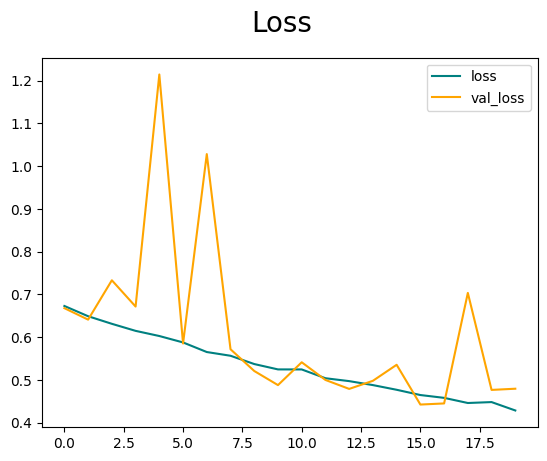

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()

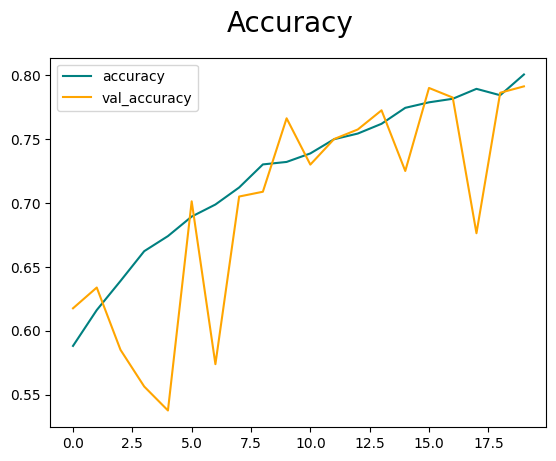

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()

In [ ]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()

In [ ]:
for batch in test_data.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  precision.update_state(y,yhat)
  recall.update_state(y, yhat)
  accuracy.update_state(y,yhat)

1/1 [==============================] - 0s 30ms/step


In [ ]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.74483377>

In [ ]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.829>

In [ ]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.7725>

In [ ]:
#Use this created model

In [ ]:
!pip install opencv-python

In [ ]:
import cv2

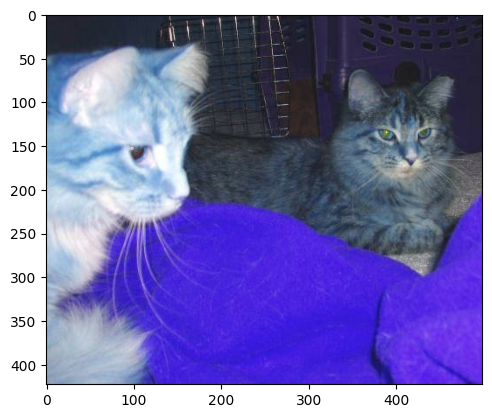

In [ ]:
image = cv2.imread("/content/cats-and-dogs-for-classification/cats_dogs/test/cats/cat.4068.jpg")
plt.imshow(image)
plt.show()

In [ ]:
resized_image = tf.image.resize(image, IMAGE_SIZE)
scaled_image = resized_image/255

In [ ]:
scaled_image

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.14509805, 0.14509805, 0.19215687],
        [0.14509805, 0.14509805, 0.19215687],
        [0.14509805, 0.14509805, 0.19215687],
        ...,
        [0.16010413, 0.14405021, 0.24237432],
        [0.13760543, 0.12311401, 0.2181661 ],
        [0.14057904, 0.13306496, 0.20808087]],

       [[0.14509805, 0.14509805, 0.19215687],
        [0.14509805, 0.14509805, 0.19215687],
        [0.14509805, 0.14509805, 0.19215687],
        ...,
        [0.13584876, 0.1327544 , 0.1943691 ],
        [0.13840918, 0.14455195, 0.17815606],
        [0.12146816, 0.12146816, 0.17278557]],

       [[0.13912377, 0.13912377, 0.1861826 ],
        [0.13912377, 0.13912377, 0.1861826 ],
        [0.14284602, 0.14284602, 0.18990484],
        ...,
        [0.1117957 , 0.11770869, 0.15294154],
        [0.08761358, 0.10585806, 0.10466321],
        [0.09283088, 0.09851409, 0.13420649]],

       ...,

       [[0.5253953 , 0.60648894, 0.6931832 ],
        [0.54

In [ ]:
np.expand_dims(scaled_image, 0).shape

(1, 128, 128, 3)

In [ ]:
y_hat = model.predict(np.expand_dims(scaled_image, 0))

1/1 [==============================] - 0s 19ms/step


In [ ]:
y_hat

array([[0.69741505]], dtype=float32)

In [ ]:
if y_hat >= 0.5:
    print(f'{class_names[1]}')
else:
    print(f'{class_names[0]}')

dogs
